# Data Analytics Bootcamp - Project 1
## American Regions

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [10]:
# Research data files
america_path = "Resources/datafile2_per_region.csv"

# Read the mouse data and the study results
america_data = pd.read_csv(america_path)

america_data

,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income Composition of Resources,Schooling,Region
0,Canada,2014,Developing,82.0,65,2,8.10,102.190217,55,418,...,2,91,1.45,91,0.1,544.43376,35544564.0,0.912,15.9,North America
1,Canada,2013,Developing,81.8,67,2,8.20,9733.228019,55,83,...,2,91,1.67,91,0.1,52413.72116,35155451.0,0.909,15.9,North America
2,Canada,2012,Developing,81.6,68,2,8.30,9748.636237,7,10,...,2,99,1.78,95,0.1,52496.69487,3475545.0,0.907,15.9,North America
3,Canada,2011,Developing,81.5,68,2,8.20,971.928038,7,803,...,2,87,1.82,87,0.1,5282.21760,3434278.0,0.903,15.9,North America
4,Canada,2010,Developing,81.2,7,2,8.40,8649.674911,56,99,...,2,88,11.20,89,0.1,47447.47620,345274.0,0.898,15.9,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Trinidad and Tobago,2008,Developing,69.9,185,0,6.41,1902.693048,9,0,...,0,91,4.40,9,0.3,21188.11857,1315372.0,0.767,12.4,Caribbean
236,Trinidad and Tobago,2007,Developing,69.7,187,0,6.37,136.883668,89,0,...,0,9,4.82,88,0.7,1653.18440,13926.0,0.760,12.4,Caribbean
237,Trinidad and Tobago,2006,Developing,69.6,188,0,6.35,103.371069,89,0,...,0,89,4.49,92,0.6,1495.96337,133144.0,0.751,12.3,Caribbean
238,Trinidad and Tobago,2005,Developing,69.5,189,0,6.12,1187.949491,95,0,...,0,95,5.31,95,0.5,12323.12750,1296934.0,0.745,12.3,Caribbean


In [17]:
# america_data.describe()

In [4]:
# Group the data by region and calculate the average life expectancy within each group
average_life_expectancy_by_region = america_data.groupby(['Country', 'Region'])['Life expectancy'].mean().reset_index()

# Sort the result by region in ascending order
#sorted_average_life_expectancy = average_life_expectancy_by_region.sort_values(ascending=True)

# Print the sorted result
#print(sorted_average_life_expectancy)

# Sort the result by region
sorted_result = average_life_expectancy_by_region.sort_values(by='Region')

# Print the sorted result
sorted_result

,Country,Region,Life expectancy
1,Belize,Caribbean,69.445455
14,Jamaica,Caribbean,74.645455
12,Haiti,Caribbean,62.900000
21,Trinidad and Tobago,Caribbean,71.745455
7,Dominican Republic,Caribbean,72.363636
17,Panama,Central America,76.690909
13,Honduras,Central America,73.409091
10,Guatemala,Central America,73.140000
9,El Salvador,Central America,72.145455
16,Nicaragua,Central America,73.036364


In [30]:
## Added for min max of actuals ages

# Find the rows with the highest mean life expectancy within each region
highest_life_expectancy_normal = america_data.loc[america_data.groupby('Region')['Life expectancy'].idxmax()]

# Print the highest and lowest values per region
print("Highest Life Expectancy per Region:")
highest_life_expectancy_normal

Highest Life Expectancy per Region:


,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income Composition of Resources,Schooling,Region
231,Trinidad and Tobago,2012,Developing,78.0,174,0,6.70,1486.236406,92,0,...,0,91,5.78,92,0.4,19152.53100,1341588.0,0.772,12.6,Caribbean
11,Costa Rica,2014,Developing,79.5,96,1,3.45,384.512914,91,1,...,1,91,9.31,91,0.1,1647.44179,4757575.0,0.768,13.9,Central America
6,Canada,2008,Developing,87.0,74,2,8.30,8433.936814,28,62,...,2,89,1.30,92,0.1,46596.33599,33245773.0,0.897,15.8,North America
109,Chile,2014,Developing,83.0,83,2,7.16,2352.999591,95,0,...,2,95,7.79,95,0.1,14817.37778,17613798.0,0.841,16.2,South America


In [5]:
# Find the rows with the highest mean life expectancy within each region
highest_life_expectancy = average_life_expectancy_by_region.loc[average_life_expectancy_by_region.groupby('Region')['Life expectancy'].idxmax()]

# Print the highest and lowest values per region
print("Highest Life Expectancy per Region:")
highest_life_expectancy

Highest Life Expectancy per Region:


,Country,Region,Life expectancy
14,Jamaica,Caribbean,74.645455
6,Costa Rica,Central America,78.772727
3,Canada,North America,82.463636
4,Chile,South America,79.944444


In [6]:
# Find the rows with the lowest mean life expectancy within each region
lowest_life_expectancy = average_life_expectancy_by_region.loc[average_life_expectancy_by_region.groupby('Region')['Life expectancy'].idxmin()]

print("\nLowest Life Expectancy per Region:")
lowest_life_expectancy


Lowest Life Expectancy per Region:


,Country,Region,Life expectancy
12,Haiti,Caribbean,62.900000
9,El Salvador,Central America,72.145455
3,Canada,North America,82.463636
11,Guyana,South America,65.690909


In [7]:
america_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          240 non-null    object 
 1   Year                             240 non-null    int64  
 2   Status                           240 non-null    object 
 3   Life expectancy                  240 non-null    float64
 4   Adult Mortality                  240 non-null    int64  
 5   Infant Deaths                    240 non-null    int64  
 6   Alcohol                          240 non-null    float64
 7   Percentage Expenditure           240 non-null    float64
 8   Hepatitis B                      240 non-null    int64  
 9   Measles                          240 non-null    int64  
 10  BMI                              240 non-null    float64
 11  Under-Five Deaths                240 non-null    int64  
 12  Polio                 

<IPython.core.display.Javascript object>


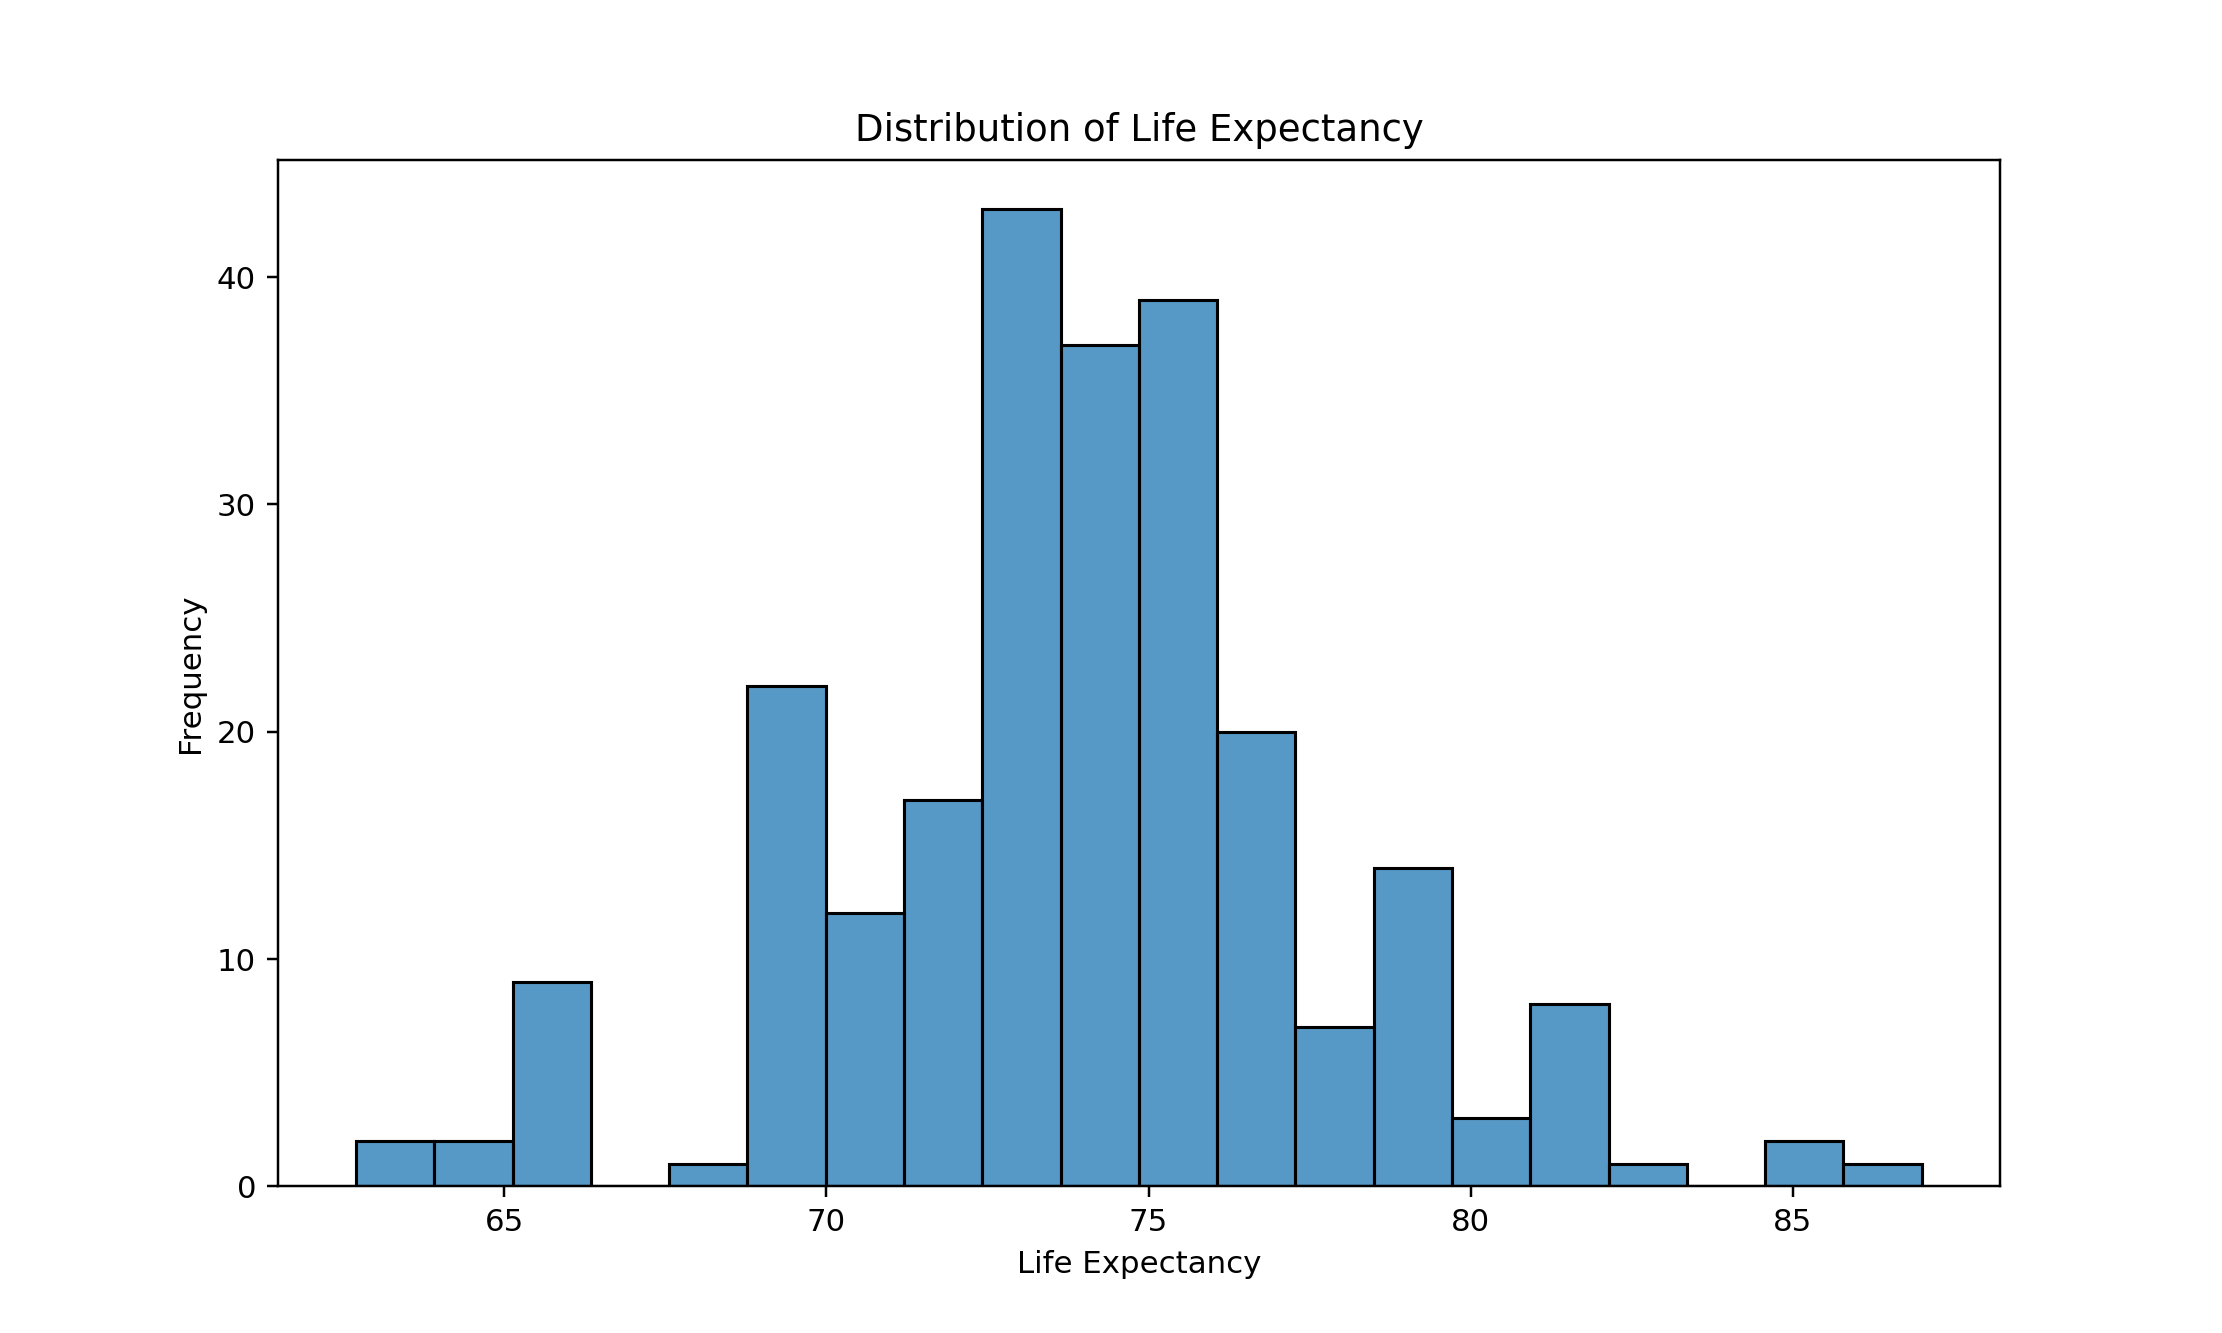

In [21]:
# Histogram of life expectancy across all countries within this dataset
plt.figure(figsize=(10, 6))
sns.histplot(america_data['Life expectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()

In [9]:
## Bonus analysis

# Research data files
all_path = "Resources/datafile_per_region.csv"

# Read the mouse data and the study results
all_countries_data = pd.read_csv(all_path)

all_countries_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa
1646,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa
1647,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa


<IPython.core.display.Javascript object>


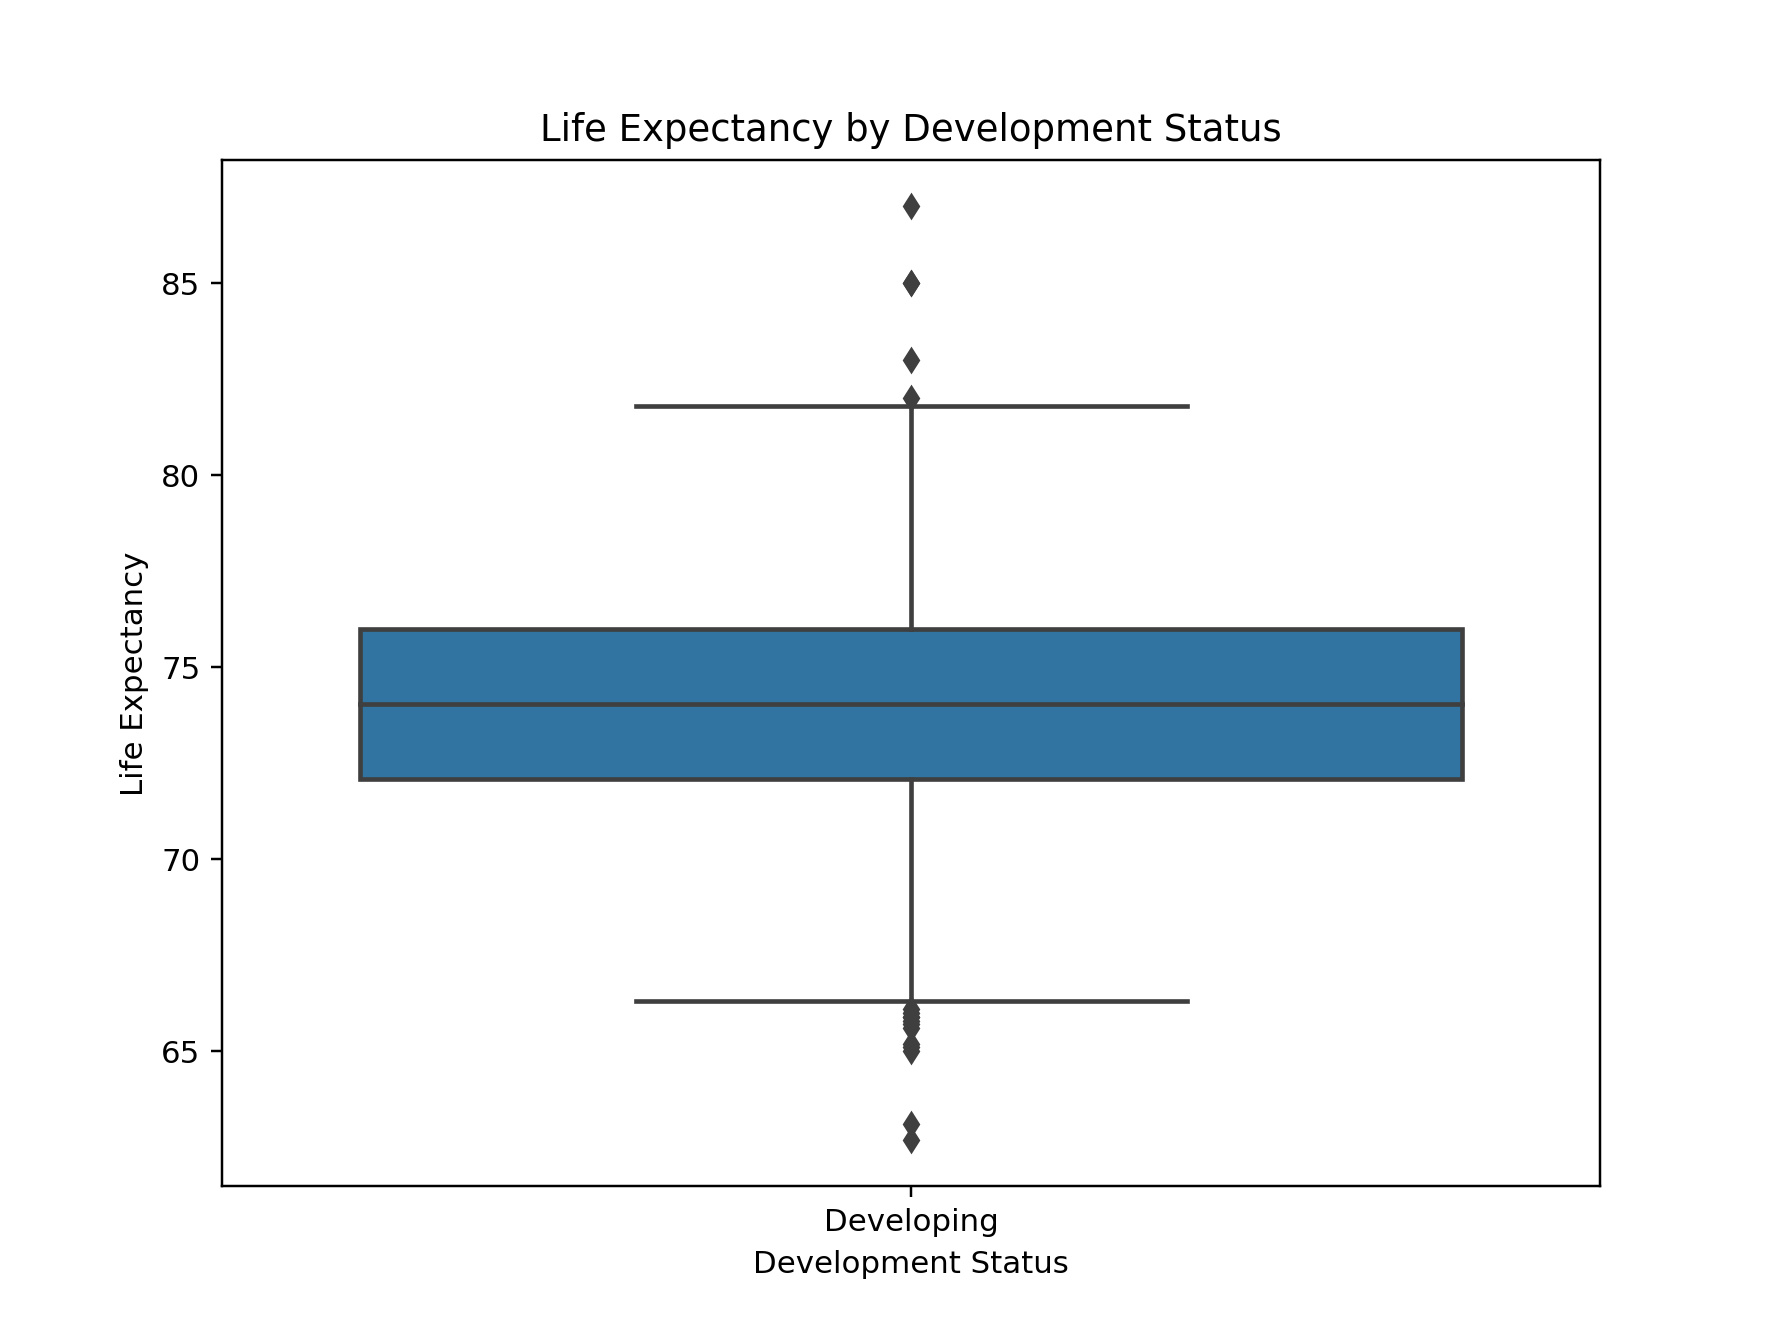

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Status', y='Life expectancy', data=america_data)
plt.xlabel('Development Status')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Development Status')
plt.show()

### Analysis of the data

Limitations:
We utilised a dataset available on Kaggle. For the purpose of analysis, the dataset offered a lot of potential. However, as we were going through the results we noticed some discrepancies which skewed our results. For the purpose of transparency, we are listing a few such issues below.

1. The Status column distinguishes Developed and Developing countries. However, in the case of Canada the Status shows Developing even though it is a Developed country. 
